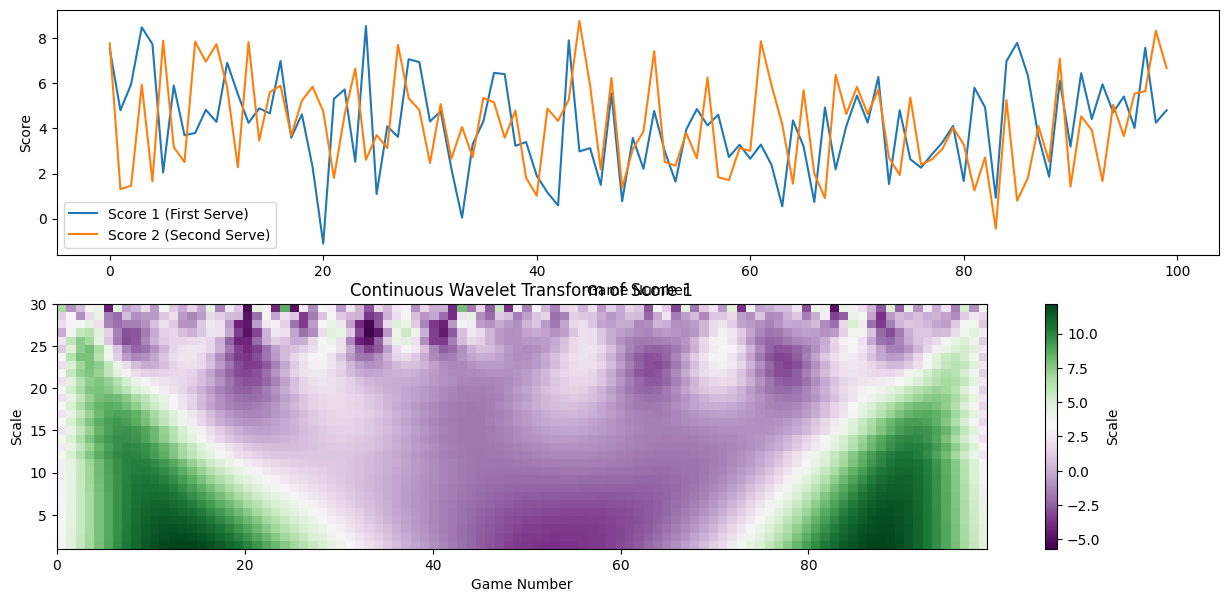

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, ricker

# 随机生成模拟网球比赛的先发与后发得分数据
np.random.seed(0)  # 设置随机种子以确保结果可复现
num_points = 100  # 数据点数量
time = np.linspace(0, 99, num_points)  # 时间轴（例如可以代表比赛局数）
score1 = np.random.normal(loc=4, scale=2, size=num_points)  # 先发方得分
score2 = np.random.normal(loc=4, scale=2, size=num_points)  # 后发方得分

# 小波分析部分（此处我们仅对先发方得分做小波分析示例），使用Morlet小波
morlet = ricker  # Morlet小波在scipy.signal中没有直接提供，这里用ricker近似
scales = np.arange(1, 31)  # 小波尺度范围，可以根据实际需求调整
# 对于真实的小波函数库如pywt，您可以使用'morl'作为小波名
# 在scipy.signal中，我们需要自己实现或选择内置函数替代
cwt_result = cwt(score1, morlet, scales / 2)  # 注意尺度可能需要除以2，取决于具体小波基的定义

# 绘制原始得分曲线和小波变换结果
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(time, score1, label='Score 1 (First Serve)')
plt.plot(time, score2, label='Score 2 (Second Serve)')
plt.legend()
plt.xlabel('Game Number')
plt.ylabel('Score')

plt.subplot(2, 1, 2)
plt.imshow(cwt_result, cmap='PRGn', aspect='auto', extent=[time[0], time[-1], scales[0], scales[-1]])
plt.colorbar(label='Scale')
plt.xlabel('Game Number')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform of Score 1')

plt.show()

# 如果你想进一步分析周期性特征，可以通过查找小波系数峰值等方式来确定潜在的周期模式。


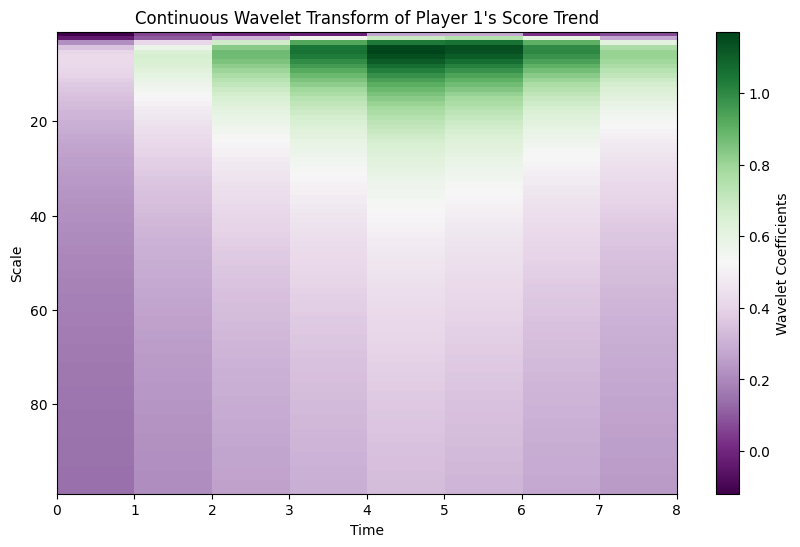

Chi-squared statistic: 0.27
P-value: 0.6056
There is no significant correlation between the two players' scoring patterns based on this test.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, ricker
from scipy.stats import chi2_contingency

# 假设球员1和球员2每局比赛得分情况（这里仅模拟了前几局）
player1_scores = [0, 0, 1, 1, 0, 1, 1, 0]  # 球员1得分序列
player2_scores = [1, 1, 1, 0, 1, 0, 1, 1]  # 球员2得分序列

# 将数据转换为二维数组，以便于后续处理
scores_matrix = np.array([player1_scores, player2_scores])

# 对于小波分析，由于这个得分序列过于稀疏且离散，不适合直接应用连续小波变换，
# 通常我们会对连续变化的数据进行小波分析以获取时间-频率特性。
# 若需要可视化每个球员得分趋势的小波特征，可能需要构建连续的时间序列数据或考虑其他类型的分析方法。

# 不过，为了展示小波分析的基本过程，我们可以构造一个连续信号来模拟某个球员的得分趋势：
time_axis = np.linspace(0, len(player1_scores) - 1, len(player1_scores))  # 时间轴
player1_smoothed = np.convolve(player1_scores, np.ones(5)/5, mode='same')  # 对得分做平滑处理模拟连续趋势

# 使用Ricker小波进行小波变换（这里仅为示例，实际是否适用需根据具体问题判断）
scales = np.arange(1, 100)
# 定义Ricker小波的特征频率（这里假设为1）
# 定义Ricker小波的特征频率（这里假设为1）

wavelet_frequency = 1


# 根据scales生成对应的宽度值

widths = scales / wavelet_frequency  # 这里是基于特征频率计算宽度的一个简单示例，实际应用中可能需要更精确转换


# 使用Ricker小波进行小波变换

cwt_result = cwt(player1_smoothed, ricker, widths)
# 绘制小波系数图像
plt.figure(figsize=(10, 6))
plt.imshow(cwt_result, cmap='PRGn', aspect='auto', extent=[0, len(player1_scores), max(scales), min(scales)])
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform of Player 1\'s Score Trend')
plt.colorbar(label='Wavelet Coefficients')
plt.show()

# 对于卡方检验，我们需要检查的是两个球员得分之间是否存在显著关联性
# 这里我们将统计在所有回合中两人得分模式的联合频数
contingency_table = np.array([[sum(scores_matrix[0] == 0), sum(scores_matrix[0] == 1)],
                              [sum(scores_matrix[1] == 0), sum(scores_matrix[1] == 1)]])

# 执行卡方检验
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# 输出卡方检验结果
print(f"Chi-squared statistic: {chi2_statistic:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant correlation between the two players' scoring patterns.")
else:
    print("There is no significant correlation between the two players' scoring patterns based on this test.")

In [7]:
!python3 -m pip install shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Prediction: 4-1, SHAP Values: [[-0.01766162  0.00817649 -0.01111487]
 [-0.01040035 -0.00870662 -0.00149303]
 [-0.06395077  0.06141786  0.0219329 ]
 [-0.0049901  -0.01181062 -0.00379928]
 [-0.0301081   0.03947791 -0.02996981]
 [-0.01589751  0.00741204 -0.01211453]
 [-0.01054495 -0.01038781  0.00033276]
 [-0.04297233  0.04110767 -0.01873534]
 [-0.03556342  0.03611282 -0.0211494 ]
 [ 0.03484388 -0.05301955 -0.00242433]]
Prediction: 3-3, SHAP Values: [[-2.43015099e-02  2.09054829e-02 -2.80397298e-03]
 [-2.28833027e-03 -2.16745229e-03 -1.74421744e-03]
 [-7.10709168e-03  4.77459275e-03 -3.86750107e-03]
 [-1.15017046e-03 -4.97800857e-03 -7.18209715e-05]
 [-1.34569644e-02  7.02577512e-03  2.31189290e-04]
 [-2.97824540e-02  2.34997880e-02  8.26659522e-05]
 [-2.38294001e-03 -2.42305977e-03 -1.39400021e-03]
 [-7.19368461e-03  5.26809659e-03 -4.27441197e-03]
 [-1.40588832e-02  7.45024274e-03  4.08640488e-04]
 [ 9.91560508e-03 -1.06616977e-02 -5.45390737e-03]]
Prediction: 4-0, SHAP Values: [[-0.044

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


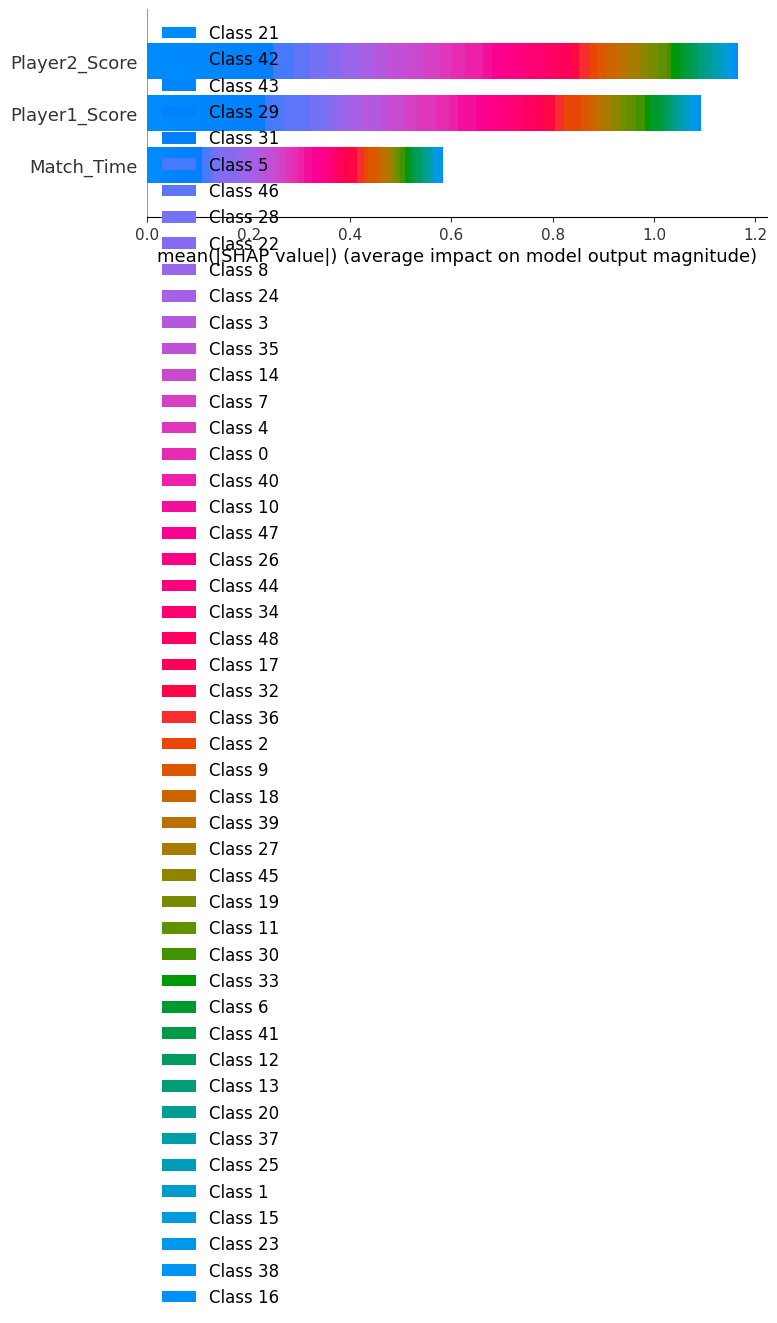

In [8]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import shap

# 设置随机数种子以确保可复现性
np.random.seed(42)

# 生成随机的网球比赛数据
def generate_tennis_data(num_matches=100):
    data = []
    for _ in range(num_matches):
        player1_score = np.random.randint(0, 7)
        player2_score = np.random.randint(0, 7)
        match_time = np.random.randint(60, 240)  # 假设比赛时间在60到240分钟之间
        current_score = f"{player1_score}-{player2_score}"
        data.append([player1_score, player2_score, match_time, current_score])
    return pd.DataFrame(data, columns=["Player1_Score", "Player2_Score", "Match_Time", "Current_Score"])

# 创建训练集
train_data = generate_tennis_data(200)
X_train = train_data.drop("Current_Score", axis=1)
y_train = train_data["Current_Score"]

# 使用随机森林模型进行训练
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 创建测试集
test_data = generate_tennis_data(10)
X_test = test_data.drop("Current_Score", axis=1)

# 进行预测
predictions = rf_model.predict(X_test)

# 使用SHAP计算影响预测的权重
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# 输出预测结果和SHAP值
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]}, SHAP Values: {shap_values[i]}")
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
plt.show()

